In [1]:
#DATA PREPROCSSING 

#load in packages and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
df_churn = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

#customerid won't be significant, drop that
df_churn = df_churn.drop(columns=["customerID","TotalCharges","MonthlyCharges"])

#make missing TotalCharges values MonthlyCharges*tenure
#mask = df_churn['TotalCharges'].isna()
#df_churn.loc[mask, 'TotalCharges'] = df_churn.loc[mask, 'MonthlyCharges'] * df_churn.loc[mask, 'tenure']

#make object dypes string
df_churn = df_churn.astype({col: "string" for col in df_churn.select_dtypes(include="object").columns})


In [14]:
df_churn.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Encode target variable as binary
y = df_churn['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Identify numeric and categorical columns
numeric_features = ['tenure']
categorical_features = df_churn.columns.difference(numeric_features + ['Churn'])


# One-hot encode categorical variables
X_categorical = pd.get_dummies(df_churn[categorical_features], drop_first=True)

# Convert boolean columns to integers
X_categorical = X_categorical.astype(int)

# Combine numeric and encoded categorical features
X = pd.concat([df_churn[numeric_features], X_categorical], axis=1)

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Split data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.7, random_state=42)


# Fit logistic regression model using statsmodels
logit_model = sm.Logit(yTrain, xTrain)
result = logit_model.fit()

# Print model summary to get coefficients and p-values
print(result.summary())

# Evaluate model accuracy on test set
predictions = result.predict(xTest) >= 0.5  # Convert probabilities to binary outcomes
accuracy = np.mean(predictions == yTest)
print("Model accuracy on test set:", accuracy)

Optimization terminated successfully.
         Current function value: 0.416056
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 2112
Model:                          Logit   Df Residuals:                     2090
Method:                           MLE   Df Model:                           21
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                  0.2675
Time:                        22:52:33   Log-Likelihood:                -878.71
converged:                       True   LL-Null:                       -1199.6
Covariance Type:            nonrobust   LLR p-value:                2.599e-122
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.1953   3.1

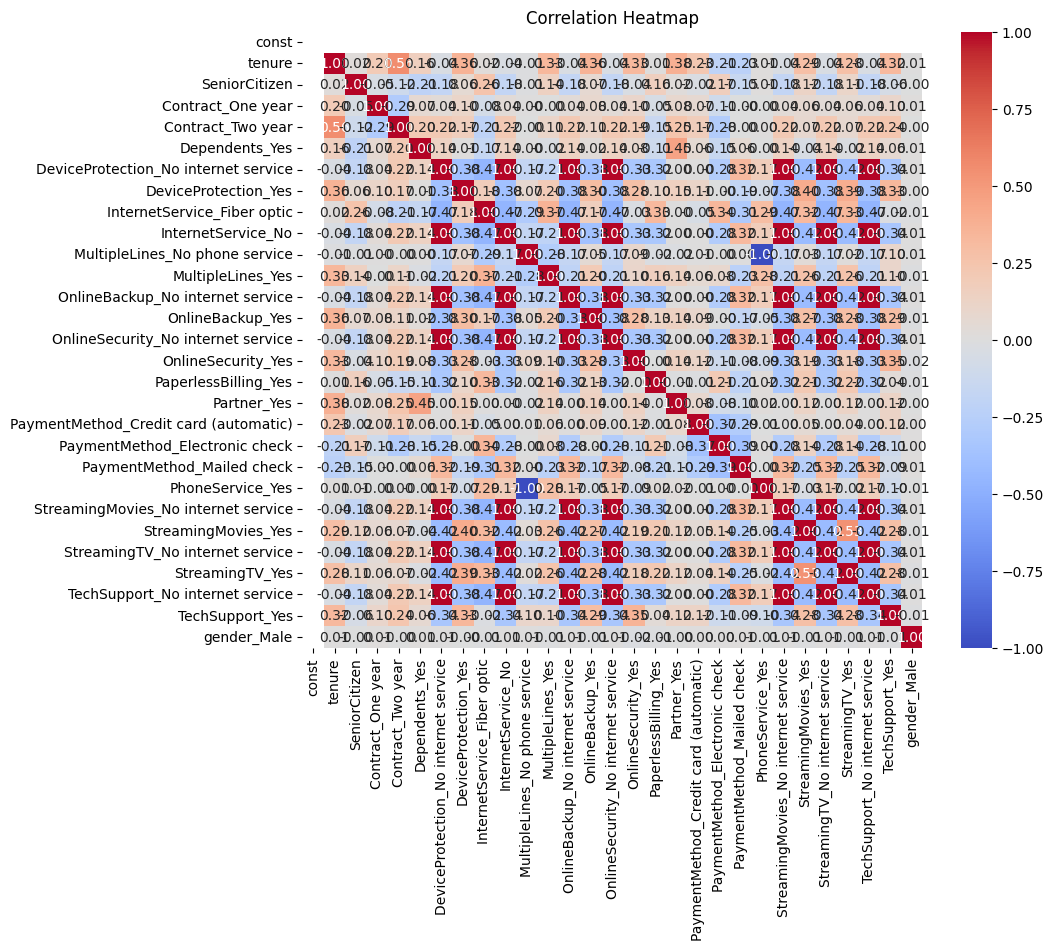

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = X.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

C:\Users\fnapp\.julia\conda\3\x86_64\lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\fnapp\.julia\conda\3\x86_64\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                  Feature       VIF
0                                   const  0.000000
1                                  tenure  2.784155
2                           SeniorCitizen  1.153317
3                       Contract_One year  1.621942
4                       Contract_Two year  2.613895
5                          Dependents_Yes  1.383696
6    DeviceProtection_No internet service       inf
7                    DeviceProtection_Yes  1.481035
8             InternetService_Fiber optic  2.006234
9                      InternetService_No       inf
10         MultipleLines_No phone service       inf
11                      MultipleLines_Yes  1.421524
12       OnlineBackup_No internet service       inf
13                       OnlineBackup_Yes  1.380415
14     OnlineSecurity_No internet service       inf
15                     OnlineSecurity_Yes  1.415899
16                   PaperlessBilling_Yes  1.208892
17                            Partner_Yes  1.462121
18  PaymentM

In [19]:
import gurobipy as gp
from gurobipy import Model, GRB, quicksum


In [23]:
def convert_labels(y):
    return [1 if label == "No" else -1 for label in y]

In [21]:
df_churn.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [26]:
import gurobipy as gp
from gurobipy import GRB
import numpy as np

rho = 0.1
q = 2
X_array = X.to_numpy()
n, p = X.shape

# Create a new model
model = gp.Model("RobustLogisticRegression")

# Add variables
beta = model.addMVar(p, lb=-GRB.INFINITY, ub=GRB.INFINITY, name="beta")
beta0 = model.addVar(lb=-GRB.INFINITY, ub=GRB.INFINITY, name="beta0")
t = model.addMVar(n, lb=0, ub=GRB.INFINITY, name="t")

# Add auxiliary variables for log and exp terms
z = model.addMVar(n, lb=0, ub=GRB.INFINITY, name="z")
w = model.addMVar(n, lb=0, ub=GRB.INFINITY, name="w")

# Set objective
obj = gp.QuadExpr()
obj += gp.quicksum(z[i] for i in range(n))

# Add constraints for log and exp terms
for i in range(n):
    model.addConstr(w[i] == gp.quicksum(X_array[i, j] * beta[j] for j in range(p)) + beta0)
    model.addConstr(gp.exp(z[i] - 1) <= 1 + gp.exp(-y[i] * w[i]))
    model.addConstr(gp.exp(z[i] - 1) >= 1 + gp.exp(-y[i] * w[i]))

# Add robustness term
if q == 1:
    u = model.addMVar(p, lb=0, ub=GRB.INFINITY, name="u")
    model.addConstrs((u[j] >= beta[j] for j in range(p)))
    model.addConstrs((u[j] >= -beta[j] for j in range(p)))
    obj += rho * gp.quicksum(u)
elif q == 2:
    obj += rho * gp.quicksum(beta[j]*beta[j] for j in range(p))**0.5
elif q == np.inf:
    v = model.addVar(lb=0, ub=GRB.INFINITY, name="v")
    model.addConstrs((v >= beta[j] for j in range(p)))
    model.addConstrs((v >= -beta[j] for j in range(p)))
    obj += rho * v

model.setObjective(obj, GRB.MINIMIZE)

# Optimize the model
model.optimize()

# Print results
print("Optimal beta:", beta.X)
print("Optimal beta0:", beta0.X)
print("Objective value:", model.objVal)

ValueError: Unable to avoid copy while creating an array as requested.
If using `np.array(obj, copy=False)` replace it with `np.asarray(obj)` to allow a copy when needed (no behavior change in NumPy 1.x).
For more details, see https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword.

In [97]:
import numpy as np
import pandas as pd
from gurobipy import Model, GRB, quicksum
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data setup
np.random.seed(42)
y = df_churn['Churn'].values
X = df_churn.drop('Churn', axis=1).values

# Splitting the data
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.7, random_state=42)

# Standardizing the data
scaler = StandardScaler()
xTrain = scaler.fit_transform(xTrain)
xTest = scaler.transform(xTest)

# Parameters for robust optimization
alpha = 1.0  # Regularization parameter
delta = 0.1  # Robustness parameter (perturbation)

# Initialize Gurobi Model
model = Model("RobustLogisticRegression")

# Variables
n, p = xTrain.shape
beta = model.addVars(p, lb=-GRB.INFINITY, name="beta")  # Coefficients
b0 = model.addVar(lb=-GRB.INFINITY, name="b0")  # Intercept
z = model.addVars(n, vtype=GRB.CONTINUOUS, lb=0, name="z")  # Slack variables for robust constraints

# Objective: Minimize the sum of logistic loss and L2 regularization
log_loss = quicksum(z[i] for i in range(n))
regularization = alpha * quicksum(beta[j] * beta[j] for j in range(p))
model.setObjective(log_loss + regularization, GRB.MINIMIZE)

# Constraints
for i in range(n):
    xi = xTrain[i]
    yi = yTrain[i]
    prob_constraint = yi * (quicksum(xi[j] * beta[j] for j in range(p)) + b0)
    model.addConstr(z[i] >= 1 - prob_constraint - delta * quicksum(abs(xi[j]) * beta[j] for j in range(p)))

# Optimize
model.optimize()

# Results
if model.status == GRB.OPTIMAL:
    coefficients = np.array([beta[j].X for j in range(p)])
    intercept = b0.X
    print("Optimal Coefficients:", coefficients)
    print("Optimal Intercept:", intercept)

    # Predict on Test Set
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    yPred = sigmoid(np.dot(xTest, coefficients) + intercept)
    yPredClass = (yPred > 0.5).astype(int)
    accuracy = np.mean(yPredClass == yTest)
    print("Test Set Accuracy:", accuracy)
else:
    print("Optimization did not converge.")

ValueError: could not convert string to float: 'Male'

In [98]:
import numpy as np
import pandas as pd
from gurobipy import Model, GRB, quicksum
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



# Parameters for robust optimization
alpha = 1.0  # Regularization parameter
delta = 0.1  # Robustness parameter (perturbation)

# Initialize Gurobi Model
model = Model("RobustLogisticRegression")

# Variables
n, p = xTrain.shape
beta = model.addVars(p, lb=-GRB.INFINITY, name="beta")  # Coefficients
b0 = model.addVar(lb=-GRB.INFINITY, name="b0")  # Intercept
z = model.addVars(n, vtype=GRB.CONTINUOUS, lb=0, name="z")  # Slack variables for robust constraints

# Objective: Minimize the sum of logistic loss and L2 regularization
log_loss = quicksum(z[i] for i in range(n))
regularization = alpha * quicksum(beta[j] * beta[j] for j in range(p))
model.setObjective(log_loss + regularization, GRB.MINIMIZE)

# Constraints
for i in range(n):
    xi = xTrain[i]
    yi = yTrain[i]
    prob_constraint = yi * (quicksum(xi[j] * beta[j] for j in range(p)) + b0)
    model.addConstr(z[i] >= 1 - prob_constraint - delta * quicksum(abs(xi[j]) * beta[j] for j in range(p)))

# Optimize
model.optimize()

# Results
if model.status == GRB.OPTIMAL:
    coefficients = np.array([beta[j].X for j in range(p)])
    intercept = b0.X
    print("Optimal Coefficients:", coefficients)
    print("Optimal Intercept:", intercept)

    # Predict on Test Set
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))

    yPred = sigmoid(np.dot(xTest, coefficients) + intercept)
    yPredClass = (yPred > 0.5).astype(int)
    accuracy = np.mean(yPredClass == yTest)
    print("Test Set Accuracy:", accuracy)
else:
    print("Optimization did not converge.")

TypeError: can't multiply sequence by non-int of type 'Var'

In [71]:
n_features = xTrain.shape[1]
n_samples = xTrain.shape[0]

# Create Gurobi model
model = Model("RobustLogisticRegression")
beta = model.addVars(n_features, lb=-GRB.INFINITY, name="beta")

# Define the objective using a direct approximation for log-loss
log_losses = []
for i in range(n_samples):
    y_i = yTrain.iloc[i]
    x_i = xTrain.iloc[i].values
    
    # Linear combination: beta * x_i
    lin_comb = quicksum(beta[j] * x_i[j] for j in range(n_features))
    
    # Introduce an auxiliary variable for the negative log-likelihood
    log_loss = model.addVar(lb=0, name=f"log_loss_{i}")
    
    # Add constraint: log_loss >= max(0, -y_i * lin_comb)
    model.addConstr(log_loss >= 0)
    model.addConstr(log_loss >= -y_i * lin_comb)
    
    # Approximate log(1 + exp(-y_i * (x_i * beta))) using piecewise linear constraints if necessary
    
    log_losses.append(log_loss)

# Objective: Minimize the sum of log-losses
model.setObjective(quicksum(log_losses), GRB.MINIMIZE)

# Optimize the model
model.optimize()

# Extract optimized coefficients
optimized_beta = np.array([beta[j].X for j in range(n_features)])
print("Optimized beta coefficients:", optimized_beta)

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (22631.2))

CPU model: Intel(R) Core(TM) i7-1065G7 CPU @ 1.30GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 4224 rows, 2142 columns and 9849 nonzeros
Model fingerprint: 0xe1b03e74
Coefficient statistics:
  Matrix range     [1e+00, 1e+02]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [0e+00, 0e+00]
Presolve removed 4224 rows and 2142 columns
Presolve time: 0.05s
Presolve: All rows and columns removed
Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   0.000000e+00   3.000000e-05      0s
Extra simplex iterations after uncrush: 22
      22    0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 22 iterations and 0.08 seconds (0.00 work units)
Optimal objective  0.000000000e+00
Optimized beta coefficients: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0

# Robust Logistic Regression

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Load the dataset
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
data = pd.read_csv(file_path)

# Preprocessing
# Convert 'TotalCharges' to numeric and handle errors
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Drop rows with missing values
data.dropna(inplace=True)

# Convert 'Churn' to binary values (Yes -> 1, No -> 0)
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select numerical and categorical features
categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
    'PaperlessBilling', 'PaymentMethod'
]
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical = encoder.fit_transform(data[categorical_cols])


# Combine numerical and encoded categorical features
X = np.hstack((data[numerical_cols].values, encoded_categorical))

# Target variable
y = data['Churn'].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Experiment with Logistic Regression using L1 and L2 penalties and regularization strength tuning
# Setting up grid search for hyperparameter tuning
param_grid = {
    "penalty": ["l1", "l2"],  # L1 (lasso) and L2 (ridge)
    "C": [0.01, 0.1, 1, 10],  # Inverse of regularization strength
    "solver": ["liblinear"]  # Solver compatible with L1/L2 penalties
}

# Define logistic regression model
logistic_model = LogisticRegression(random_state=42, max_iter=500)

# Perform grid search
grid_search = GridSearchCV(logistic_model, param_grid, cv=5, scoring="roc_auc")
grid_search.fit(X_train_scaled, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
best_auc = grid_search.best_score_

# Evaluate the best model on the test set
test_predictions = best_model.predict(X_test_scaled)
test_probabilities = best_model.predict_proba(X_test_scaled)[:, 1]
test_accuracy = accuracy_score(y_test, test_predictions)
test_roc_auc = roc_auc_score(y_test, test_probabilities)

# Output the results
print("Best Parameters:", best_params)
print("Best Cross-validated AUC:", best_auc)
print("Test Accuracy:", test_accuracy)
print("Test ROC-AUC:", test_roc_auc)





Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-validated AUC: 0.8479471523318246
Test Accuracy: 0.7882018479033405
Test ROC-AUC: 0.8322548415652453


In [72]:
#split up the churning and on-churning observations for clustering
nochurndf = df_churn[df_churn['Churn'] == "No"]
yeschurndf = df_churn[df_churn['Churn'] == "Yes"]

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

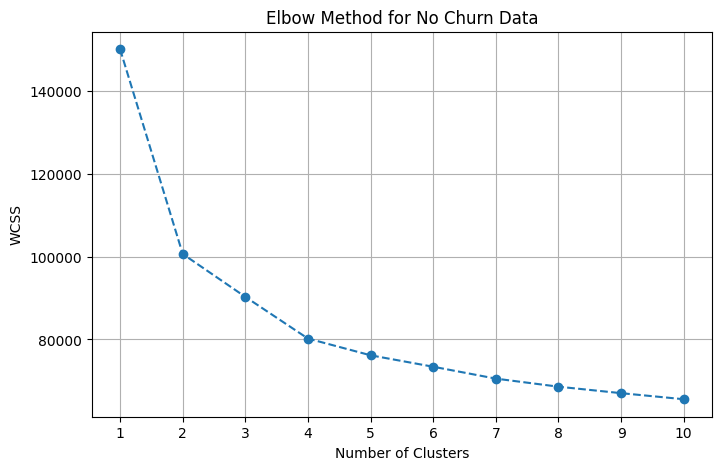

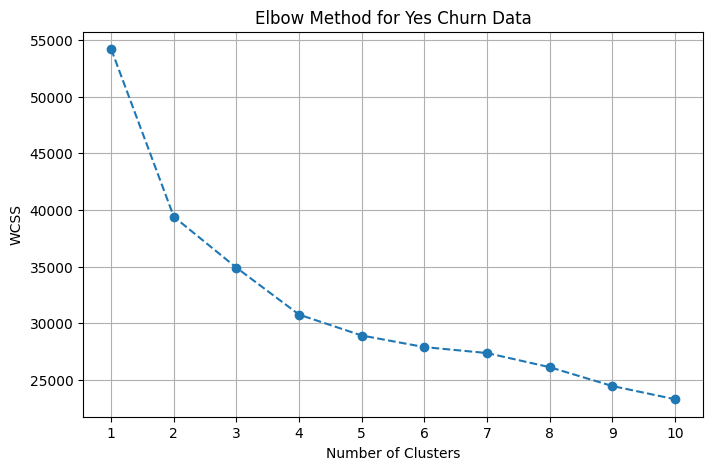

In [99]:
#elbow method for selecting the appropriate amount of clusters
def plot_elbow_method(df, max_clusters=10, title="Elbow Method"):
    # Drop 'Churn' if present
    if 'Churn' in df.columns:
        df = df.drop(columns=['Churn'])
    
    # Convert categorical columns to dummy variables
    df = pd.get_dummies(df, drop_first=True)
    
    # Scale the data
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    
    # Compute WCSS for different numbers of clusters
    wcss = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(df_scaled)
        wcss.append(kmeans.inertia_)
    
    # Plot the elbow graph
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
    plt.title(title)
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.xticks(range(1, max_clusters + 1))
    plt.grid(True)
    plt.show()
# Apply the elbow method to nochurndf
plot_elbow_method(nochurndf, title="Elbow Method for No Churn Data")

# Apply the elbow method to yeschurndf
plot_elbow_method(yeschurndf, title="Elbow Method for Yes Churn Data")


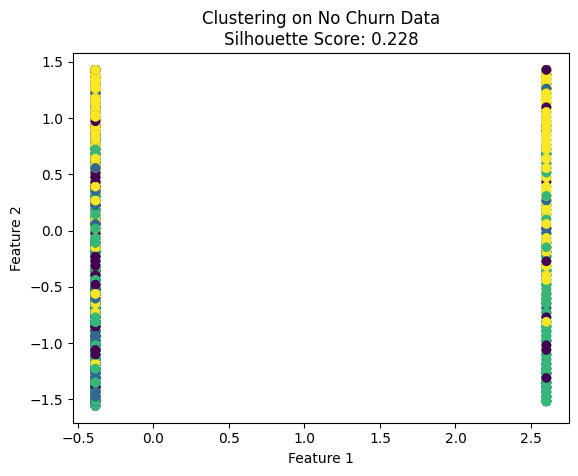

Silhouette Score for No Churn Data: 0.228


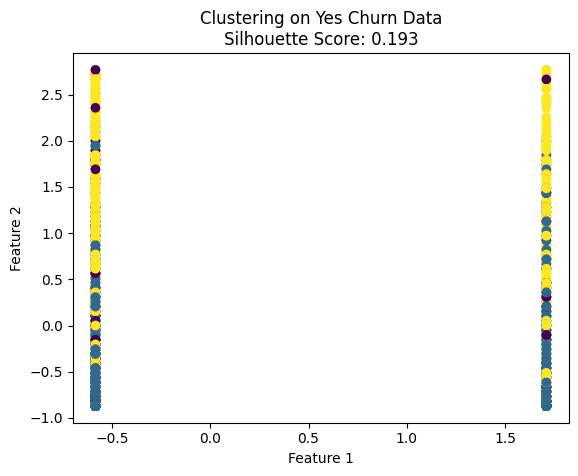

Silhouette Score for Yes Churn Data: 0.193


In [100]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def cluster_and_visualize(df, cluster_count=4, title="Clustering"):
    if 'Churn' in df.columns:
        df = df.drop(columns=['Churn'])
    
    df = pd.get_dummies(df, drop_first=True)
    
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df)
    
    kmeans = KMeans(n_clusters=cluster_count, random_state=42)
    labels = kmeans.fit_predict(df_scaled)
    
    # Calculate silhouette score
    silhouette_avg = silhouette_score(df_scaled, labels)
    
    plt.scatter(df_scaled[:, 0], df_scaled[:, 1], c=labels, cmap='viridis')
    plt.title(f"{title}\nSilhouette Score: {silhouette_avg:.3f}")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
    
    return labels, silhouette_avg

# Apply clustering to nochurndf
labels_no_churn, silhouette_no_churn = cluster_and_visualize(nochurndf, title="Clustering on No Churn Data")
print(f"Silhouette Score for No Churn Data: {silhouette_no_churn:.3f}")

# Apply clustering to yeschurndf
labels_yes_churn, silhouette_yes_churn = cluster_and_visualize(yeschurndf, title="Clustering on Yes Churn Data")
print(f"Silhouette Score for Yes Churn Data: {silhouette_yes_churn:.3f}")

In [ ]:
#interpretable clustering


In [103]:
#robust K means
import numpy as np
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.metrics.pairwise import euclidean_distances

class RobustKMeans(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusters=5, max_iter=100, tol=1e-4, lambda_param=1.0):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.lambda_param = lambda_param

    def fit(self, X):
        n_samples, n_features = X.shape
        
        # Initialize centroids randomly
        self.centroids_ = X[np.random.choice(n_samples, self.n_clusters, replace=False)]
        
        for _ in range(self.max_iter):
            old_centroids = self.centroids_.copy()
            
            # Assign points to clusters
            distances = euclidean_distances(X, self.centroids_)
            labels = np.argmin(distances, axis=1)
            
            # Update centroids
            for k in range(self.n_clusters):
                cluster_points = X[labels == k]
                if len(cluster_points) > 0:
                    new_centroid = np.mean(cluster_points, axis=0)
                    
                    # Apply robustness constraint
                    max_distance = np.max(euclidean_distances(cluster_points, [new_centroid]))
                    if max_distance > self.lambda_param:
                        new_centroid = old_centroids[k] + self.lambda_param * (new_centroid - old_centroids[k]) / max_distance
                    
                    self.centroids_[k] = new_centroid
            
            # Check for convergence
            if np.all(np.abs(old_centroids - self.centroids_) < self.tol):
                break
        
        return self

    def predict(self, X):
        distances = euclidean_distances(X, self.centroids_)
        return np.argmin(distances, axis=1)

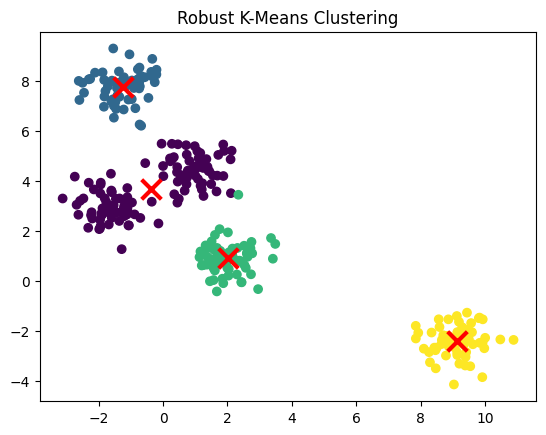

In [104]:
# Example usage
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=5, cluster_std=0.60, random_state=0)

# Create and fit the model
robust_kmeans = RobustKMeans(n_clusters=4, lambda_param=2.0)
robust_kmeans.fit(X)

# Predict clusters
labels = robust_kmeans.predict(X)

# Visualize results (if working with 2D data)
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(robust_kmeans.centroids_[:, 0], robust_kmeans.centroids_[:, 1], marker='x', s=200, linewidths=3, color='r')
plt.title('Robust K-Means Clustering')
plt.show()

In [106]:
from sklearn.metrics import silhouette_score

# Assuming X is your data and labels are the cluster assignments from robust k-means
silhouette_avg = silhouette_score(X, labels)
print(silhouette_avg)

0.6428049727425702


# Robust K-Means

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, adjusted_rand_score

# Load the dataset
file_path = 'WA_Fn-UseC_-Telco-Customer-Churn.csv'
data = pd.read_csv(file_path)

# Preprocessing
# Convert 'TotalCharges' to numeric and handle errors
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Drop rows with missing values
data.dropna(inplace=True)

# Convert 'Churn' to binary values (Yes -> 1, No -> 0)
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select numerical and categorical features
categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
    'PaperlessBilling', 'PaymentMethod'
]
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# One-hot encode categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
encoded_categorical = encoder.fit_transform(data[categorical_cols])

# Combine numerical and encoded categorical features
X = np.hstack((data[numerical_cols].values, encoded_categorical))

# Target variable
y = data['Churn'].values

# Standardize the features for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define robust k-means functions
def robust_k_means(X, k, max_iter=100, lambda_param=0.5, tol=1e-4):
    """
    Robust k-means clustering implementation.
    
    Parameters:
        X (array-like): The dataset.
        k (int): Number of clusters.
        max_iter (int): Maximum number of iterations.
        lambda_param (float): Lambda parameter for center adjustment.
        tol (float): Tolerance for convergence.
    
    Returns:
        centers (array): Cluster centers.
        labels (array): Cluster assignments.
    """
    n_samples, n_features = X.shape
    # Initialize cluster centers randomly
    np.random.seed(42)
    centers = X[np.random.choice(n_samples, k, replace=False)]
    
    for iteration in range(max_iter):
        # Assign points to the nearest cluster center
        distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)  # Distances to all centers
        labels = np.argmin(distances, axis=1)
        
        new_centers = np.zeros_like(centers)
        for i in range(k):
            cluster_points = X[labels == i]
            if len(cluster_points) > 0:
                # Update c_k^new
                c_k_new = np.mean(cluster_points, axis=0)
                # Calculate d_max
                d_max = np.max(np.linalg.norm(cluster_points - c_k_new, axis=1))
                # Adjust c_k
                centers[i] += lambda_param * (c_k_new - centers[i]) / max(d_max, tol)
                new_centers[i] = centers[i]
            else:
                new_centers[i] = centers[i]  # Retain old center if no points in cluster

        # Check for convergence
        if np.linalg.norm(new_centers - centers) < tol:
            break
        centers = new_centers
    
    return centers, labels

# Run robust k-means on the data with 2 clusters (Churn vs. Non-Churn)
k = 2
centers, labels = robust_k_means(X_scaled, k)

# Evaluate clustering by comparing to the "Churn" labels
# Map clusters to churn labels for better comparison
cluster_to_label = {i: np.bincount(y[labels == i]).argmax() for i in range(k)}

# Map predicted clusters to churn labels
predicted_labels = np.array([cluster_to_label[label] for label in labels])

# Calculate metrics
accuracy = accuracy_score(y, predicted_labels)
adjusted_rand = adjusted_rand_score(y, labels)

# Output the results
print("Accuracy:", accuracy)
print("Adjusted Rand Index:", adjusted_rand)





Accuracy: 0.7342150170648464
Adjusted Rand Index: -0.013207744394660848


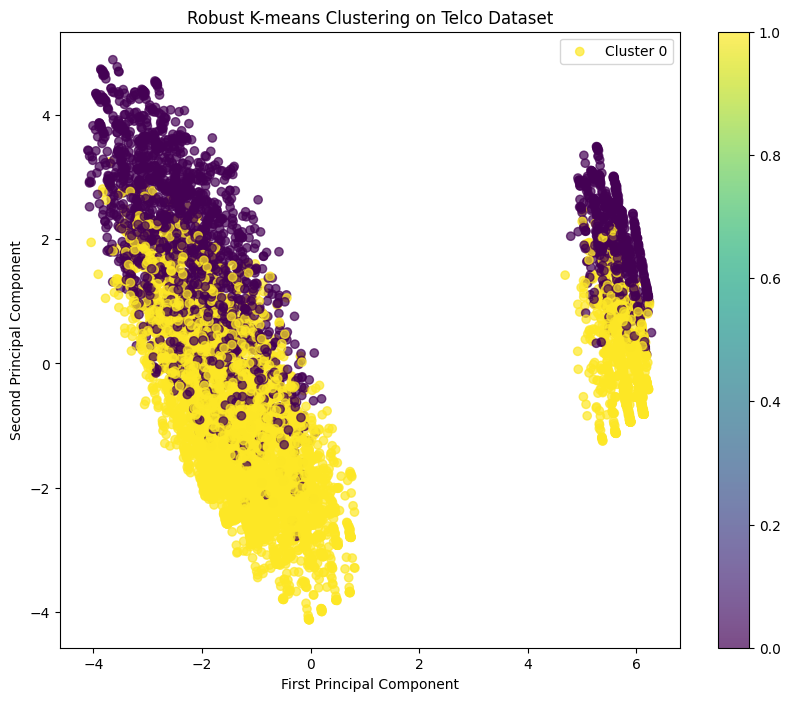

In [11]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)

# Plot cluster centers
#centers_pca = pca.transform(centers)
#plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='x', s=200, linewidths=3)

# Add a color bar
plt.colorbar(scatter)

# Add labels and title
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Robust K-means Clustering on Telco Dataset')

# Add a legend
plt.legend(['Cluster 0', 'Cluster 1', 'Cluster Centers'])

# Show the plot
plt.show()